   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year gdp_for_year ($)  \
0               6.71  Albania1987           NaN    2,156,624,900   
1               5.19  Albania1987           NaN    2,156,624,900   
2               4.83  Albania1987           NaN    2,156,624,900   
3               4.59  Albania1987           NaN    2,156,624,900   
4               3.28  Albania1987           NaN    2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Ge

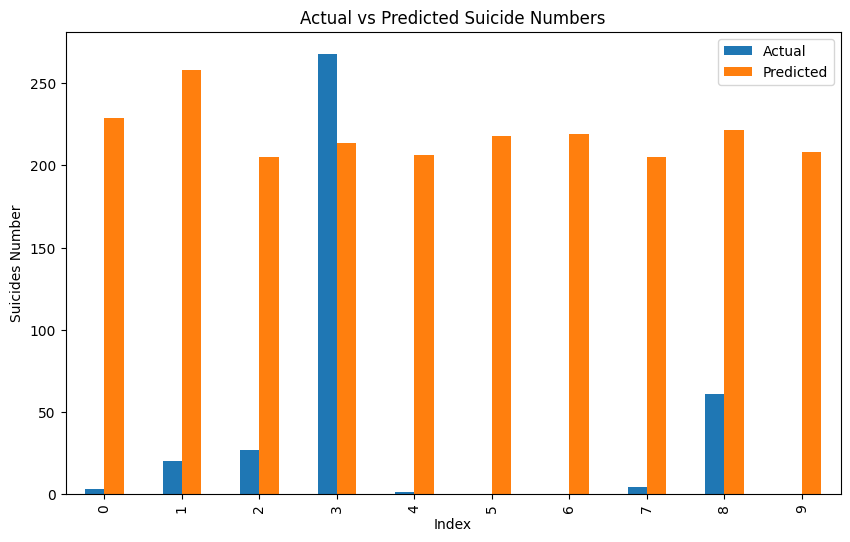

MAE score: 334.322366154378
MSE score: 751713.1328227874


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv')

# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Display the first few rows to check the data structure
print(df.head())

# Select relevant columns for linear regression (suicides_no and gdp_per_capita)
X = df[['gdp_per_capita ($)']]
y = df[['suicides_no']]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Initialize the linear regression model
regressor = LinearRegression()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the target values (suicides_no) on the test set
y_pred = regressor.predict(X_test)

# Model evaluation
r2 = regressor.score(X_test, y_test)  # R^2 score
print(f"R^2 score: {r2}")

# Create a DataFrame with actual and predicted values
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
print(evaluate.head(10))

# Plot the actual vs predicted values
evaluate.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Actual vs Predicted Suicide Numbers")
plt.xlabel("Index")
plt.ylabel("Suicides Number")
plt.show()

# Compute additional accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE score: {mae}")
print(f"MSE score: {mse}")
